# Task

## Classification task: 
### Decide about a good evaluation strategy and justify your choice.
1. Use GridSearchCv and corss-validation to find the best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree.
2. Which model gives the best results?

# Answer

## In this analysis below are the steps that we have followed:-
1. importing the libraries
2. Exploratory Data Analysis
3. Label Encode the categorical variables
4. Apply the Machine Learning Models (KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree)
5. Used the GridSearchCV and Cross-Validation to find out the best parameters
6. Comapared the Accuracy Scores of models with and without best parameters of ML models
7. Finally select the best models for our dataset.

## 1. Importing the Library 

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Here looking at the dataset we found that variables that have datatype as object are categorical variables, we need to change all the str values to the integer by label encodeing them. 


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
#this dataset is an imbalanced dataset
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
data.shape

(41188, 21)

## 2. Exploratory Data Analysis
1. We will check for distribution of variables, outliers, frequency of values in categorical variables to decide the statergy for labelencoding and binning them into suitable intervals like age.

## 1. Age

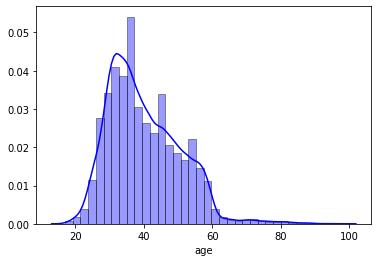

In [7]:
sns.distplot(data['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

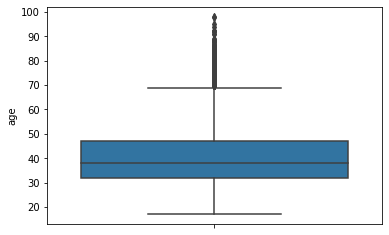

In [8]:
sns.boxplot(data['age'], orient='v')

Text(0.5, 1.0, 'Age Distribution')

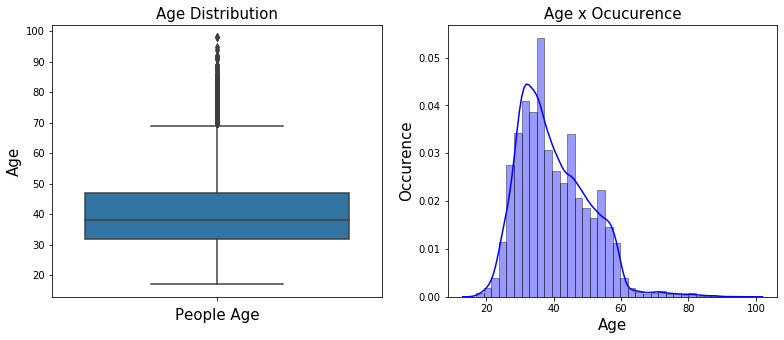

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = (13,5))

sns.distplot(data['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)


sns.boxplot(data['age'], orient='v', ax=ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)

In [10]:
# Quartiles
print('1 Quartile: ', data['age'].quantile(q = 0.25))
print('2 Quartile: ', data['age'].quantile(q = 0.50))
print('3 Quartile: ', data['age'].quantile(q = 0.75))
print('4 Quartile: ', data['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', data['age'].quantile(q = 0.75) + 
                      1.5*(data['age'].quantile(q = 0.75) - data['age'].quantile(q = 0.25)), 'are outliers')



1 Quartile:  32.0
2 Quartile:  38.0
3 Quartile:  47.0
4 Quartile:  98.0
Ages above:  69.5 are outliers


In [11]:
print('number of outliers', data[data['age']>69]['age'].count())

number of outliers 469


## 2. Job

In [12]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

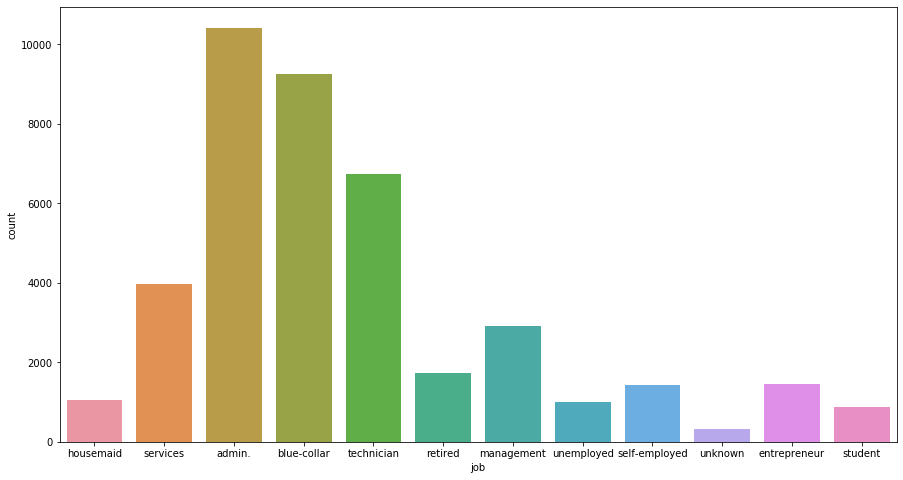

In [13]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'job', data = data)

## 3. marital

In [14]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

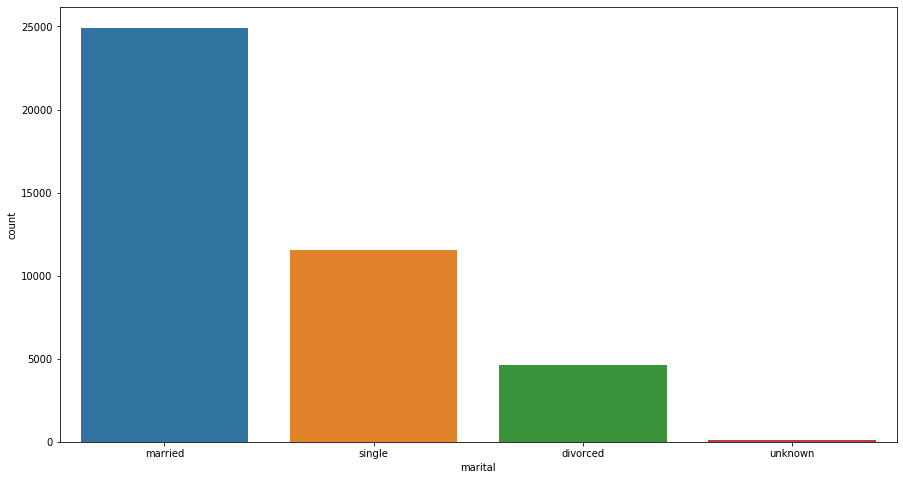

In [15]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'marital', data = data)

## 4. education

In [16]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

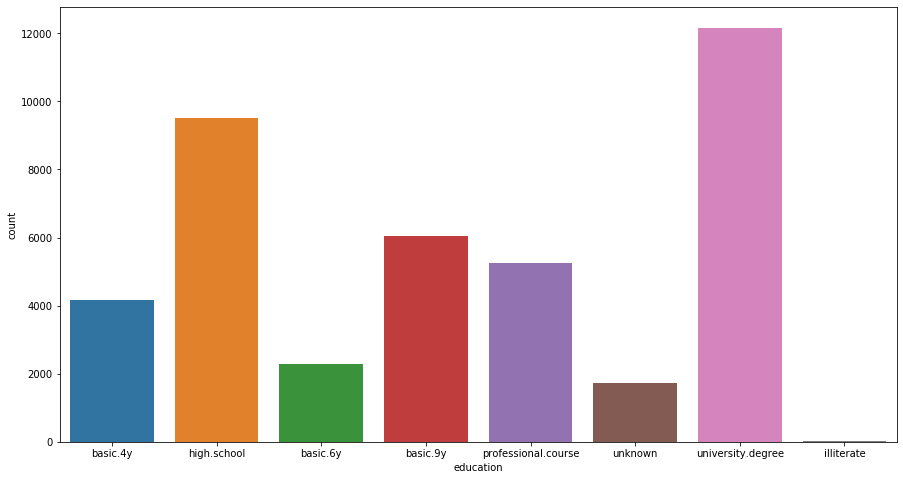

In [17]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'education', data = data)

## 5. default

In [18]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

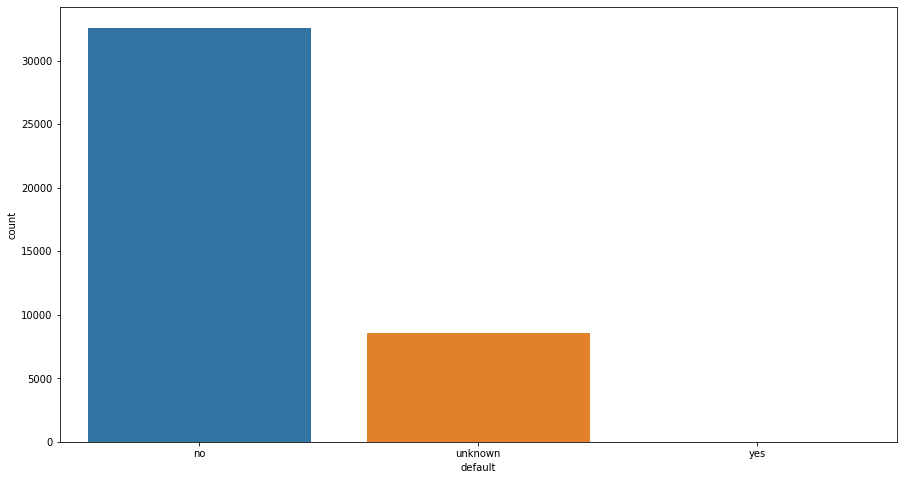

In [19]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'default', data = data)

## 6.loan

In [20]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

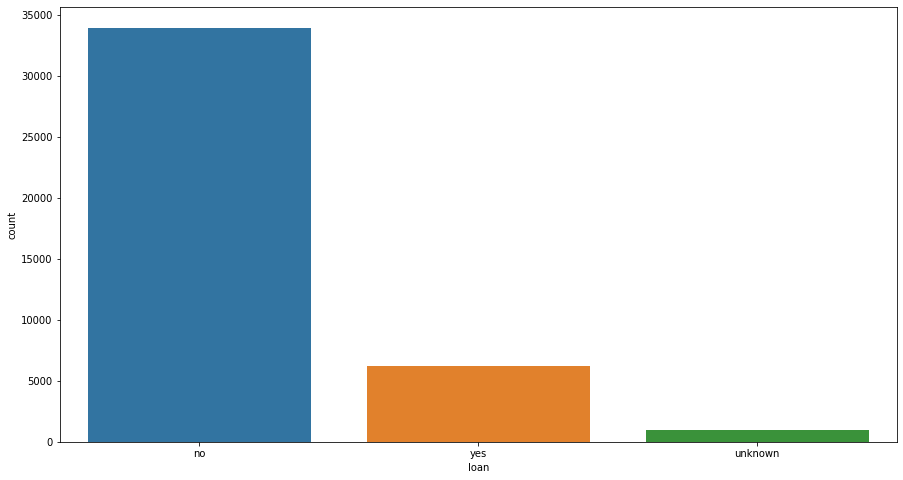

In [21]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'loan', data = data)

In [22]:
bank_client = data.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
bank_client['job']      = labelencoder.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder.fit_transform(bank_client['loan']) 

In [24]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [25]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


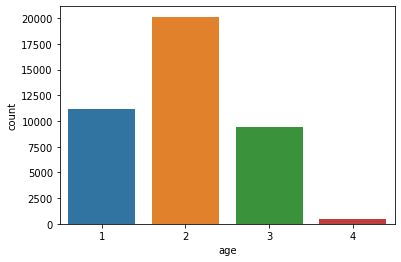

In [26]:
sns.countplot(bank_client['age'])

## till now we have done:-
1. Label encoded the 'job', 'marital', 'education', 'default', 'housing', 'loan'
2. Apply the bining method to 'AGE' by checking outliers, range of data

In [27]:
bank_related = data.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


## 7.Contact

In [28]:
bank_related['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

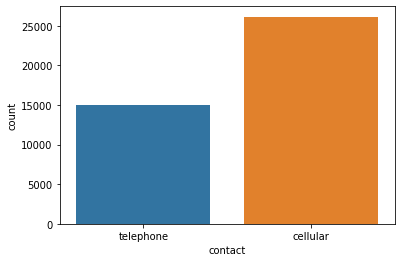

In [29]:
sns.countplot(bank_related['contact'])

## 8..month

In [30]:
bank_related['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

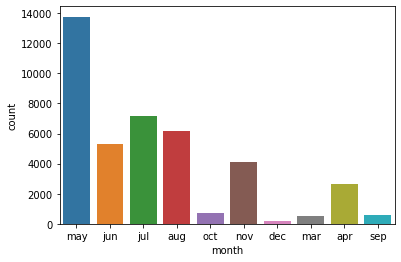

In [31]:
sns.countplot(bank_related['month'])

## 9.day_of_week

In [32]:
bank_related['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

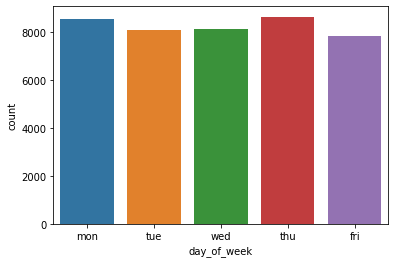

In [33]:
sns.countplot(bank_related['day_of_week'])

## 10. duration

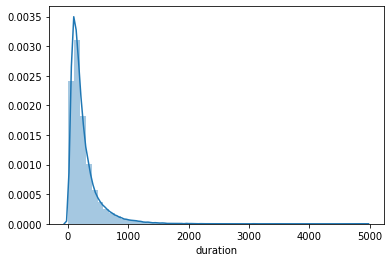

In [34]:
sns.distplot(bank_related['duration'], hist = True)

In [35]:
bank_related['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [36]:
# Quartiles
print('1 Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2 Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3 Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4 Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('duration above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)),'s are outliers')






1 Quartile:  102.0
2 Quartile:  180.0
3 Quartile:  319.0
4 Quartile:  4918.0
duration above:  644.5 s are outliers


In [37]:
bank_related[bank_related['duration']>644.5]['duration'].count()

2963

In [38]:
bank_related['contact'] = labelencoder.fit_transform(bank_related['contact']) 
bank_related['month'] = labelencoder.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder.fit_transform(bank_related['day_of_week'])

In [39]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [40]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


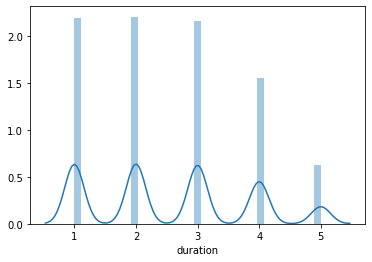

In [41]:
sns.distplot(bank_related['duration'])

## till now we have done:-
1. Label encoded the 'job', 'marital', 'education', 'default', 'housing', 'loan'
2. Apply the bining method to 'AGE' by checking outliers, range of data
3. Label encoded the 'contact', 'month', 'day_of_week'
4. Apply the bining method to 'duration' by checking outliers, range of data

In [42]:
bank_se = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [43]:
bank_o = data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


## 11. poutcome

In [44]:
bank_o['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

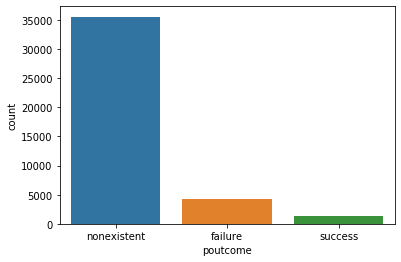

In [45]:
sns.countplot(bank_o['poutcome'])

In [46]:
bank_o['poutcome'] = labelencoder.fit_transform(bank_o['poutcome']) 

In [47]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [48]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Traget Column Encoding

In [49]:
data['y'] = labelencoder.fit_transform(data['y'])

In [50]:
y = data['y']

In [51]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

## till now we have done:-
1. Label encoded the 'job', 'marital', 'education', 'default', 'housing', 'loan'
2. Apply the bining method to 'AGE' by checking outliers, range of data
3. Label encoded the 'contact', 'month', 'day_of_week'
4. Apply the bining method to 'duration' by checking outliers, range of data
5. Label encoded the 'contact', 'poutcome'
## Till now we have converted all the variable to the int type from categorical data
6. We have converted the target variable into 1's -->(YES) 0's --> (NO).

In [52]:
bank_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
duration          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
dtypes: float64(5), int64(15)
memory usage: 6.3 MB


# 3. Applying ML Models
1. Here we will apply the 4 models and also apply GridSearchCV, Cross-Validation technique to find best parameters 
2. Then we will compare accuracy four all these four models to choose best among them 
3. we also look at the confusion matrix to see the prediction of positive class to choose best model as we can not rely upon accuracy measure.

In [53]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

#apply the Cross Validation technques so import KFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [102]:
y_test.shape
print(y_test.value_counts())

0    7279
1     959
Name: y, dtype: int64


### Standardize the dataset using StandardScaler

In [54]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

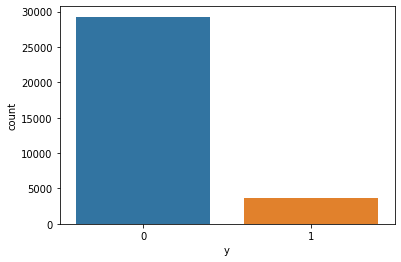

In [55]:
# we could see the dataset is not balanced
sns.countplot(y_train)

# 1. Logistic Regression

### Logistic Regression on imbalanced data set

In [56]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)

[[7105  174]
 [ 624  335]]
90.0


In [57]:
from sklearn.model_selection import cross_val_score
LOGCV1 = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
LOGCV1

0.9100455235204855

In [58]:
# Recall of minority class is ver less as compared to majority class, This Model is not a good model 
# because it is biasd towards majority class
print(classification_report(y_test, logpred)) 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7279
           1       0.66      0.35      0.46       959

    accuracy                           0.90      8238
   macro avg       0.79      0.66      0.70      8238
weighted avg       0.89      0.90      0.89      8238



### applying logistic regression on imbalanced dataset has good accuracy of 90% although if we see confusion matrix we could see there is large number of actual 1's are predicted as 0. so we have to balance the dataset by applying the sampling technique.

In [59]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 3681
Before OverSampling, counts of label '0': 29269 



## Oversampling to tackle the imbalanced dataset

### Undersampling is the technique for balancing the dataset.

In [60]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train.ravel())

In [61]:
# we could see the the now dataset is balanced with equal number of 1's and 0's
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, counts of label '1': 3681
After OverSampling, counts of label '0': 3681


### Logistic Regression over Balanced Dataset

In [62]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression() 
lr1.fit(X_train_res,y_train_res)
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7279
           1       0.42      0.85      0.56       959

    accuracy                           0.85      8238
   macro avg       0.70      0.85      0.73      8238
weighted avg       0.91      0.85      0.87      8238



In [63]:
from sklearn.model_selection import cross_val_score
LOGCV = (cross_val_score(lr1, X_train_res, y_train_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
LOGCV

0.8565639564037519

In [64]:
# we can see that the perdiction improved here as our positive class 1 now has more correct prediction
print(confusion_matrix(y_test, predictions))

[[6152 1127]
 [ 147  812]]


In [65]:
LOGCV_accuracy_score = round(accuracy_score(y_test, predictions),2)*100
print(LOGCV_accuracy_score)

85.0


### Finding best parameter for Logistic regression by applying GridSearchCV

In [66]:
# Create regularization hyperparameter space
C = np.logspace( 0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C)

In [67]:
from sklearn.model_selection import GridSearchCV

# Create Grid Search
# Create grid search using 5-fold cross validation
clf_log = GridSearchCV(lr1, hyperparameters, cv=k_fold, verbose=0,)

# Fit grid search
best_model_log = clf_log.fit(X_train_res, y_train_res)

# View best hyperparameters
print('Best C:', best_model_log.best_estimator_.get_params()['C'])


Best C: 21.544346900318832


### Logistic Regression with best parameter by GridSearchCV

In [88]:
from sklearn.linear_model import LogisticRegression
lr_final = LogisticRegression(penalty='l2', C = 2.78 ) 
lr_final.fit(X_train_res,y_train_res)
pred_log_final = lr_final.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, pred_log_final))

print(confusion_matrix(y_test, pred_log_final))

LOGCV_prec =  precision_score(y_test, pred_log_final)
print(LOGCV_prec)

LOGCV_tunned = round(accuracy_score(y_test, pred_log_final),2)*100
print(LOGCV_tunned)


              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7279
           1       0.42      0.85      0.56       959

    accuracy                           0.85      8238
   macro avg       0.70      0.85      0.73      8238
weighted avg       0.91      0.85      0.87      8238

[[6153 1126]
 [ 147  812]]
0.41898864809081526
85.0


# 2. SVM

### Linear SVM

In [69]:
from sklearn.svm import LinearSVC
linSVC = LinearSVC()
linSVC.fit(X_train_res,y_train_res)
linSVC_pred = linSVC.predict(X_test)

# print classification report 
print(classification_report(y_test, linSVC_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7279
           1       0.41      0.85      0.55       959

    accuracy                           0.84      8238
   macro avg       0.69      0.84      0.73      8238
weighted avg       0.91      0.84      0.86      8238



/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [70]:
print(confusion_matrix(y_test, linSVC_pred))

SVCCV_accuracy_score = round(accuracy_score(y_test, linSVC_pred),2)*100
print(SVCCV_accuracy_score)

[[6092 1187]
 [ 141  818]]
84.0


### KernalSVM with polynomial kernal 


In [71]:
from sklearn.svm import SVC
svc_poly= SVC(kernel = 'poly')
svc_poly.fit(X_train_res,y_train_res)
Ker_pred_poly = svc_poly.predict(X_test)

print(confusion_matrix(y_test, Ker_pred_poly))

print(classification_report(y_test, Ker_pred_poly))


[[6224 1055]
 [ 126  833]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      7279
           1       0.44      0.87      0.59       959

    accuracy                           0.86      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.86      0.88      8238



In [72]:
from sklearn.svm import SVC
svc_linear= SVC(kernel = 'linear')
svc_linear.fit(X_train_res,y_train_res)
Ker_pred_linear = svc_linear.predict(X_test)

print(confusion_matrix(y_test, Ker_pred_linear))

print(classification_report(y_test, Ker_pred_linear))


[[5966 1313]
 [ 126  833]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7279
           1       0.39      0.87      0.54       959

    accuracy                           0.83      8238
   macro avg       0.68      0.84      0.71      8238
weighted avg       0.91      0.83      0.85      8238



## Finding best parameter and kernal for SVM by using Grid Search 

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()

#Hyper Parameters Set
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'poly']},
]

# Create a classifier object with the classifier and parameter candidates
clf_svm = GridSearchCV(model, param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf_svm.fit(X_train_res, y_train_res) 

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
# View the accuracy score
print('Best score for data1:', clf_svm.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_svm.best_estimator_.C) 
print('Best Kernel:',clf_svm.best_estimator_.kernel)
print('Best Gamma:',clf_svm.best_estimator_.gamma)

Best score for data1: 0.8662075880338854
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.001


## SVM with its best parameter

In [89]:
from sklearn.svm import SVC
svc_rbf= SVC(kernel = 'rbf', C =1000,gamma= .001 )
svc_rbf.fit(X_train_res,y_train_res)
Ker_pred_rbf = svc_rbf.predict(X_test)

print(confusion_matrix(y_test, Ker_pred_rbf))

print(classification_report(y_test, Ker_pred_rbf))

SVCCV_tunned = round(accuracy_score(y_test, Ker_pred_rbf),2)*100
print(SVCCV_tunned)


SVCCV = (cross_val_score(svc_rbf, X_train_res,y_train_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[6189 1090]
 [ 110  849]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7279
           1       0.44      0.89      0.59       959

    accuracy                           0.85      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.85      0.87      8238

85.0
0.43785456420835484


In [94]:
SVCCCV_prec_rbf =  precision_score(y_test, Ker_pred_rbf)
print(SVCCCV_prec_rbf)

0.43785456420835484


# 3. Decision Tree Classfier

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #criterion = entopy, gini
dtree.fit(X_train_res,y_train_res)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))

print(classification_report(y_test, dtreepred))

DTREECV_accuracy_score = round(accuracy_score(y_test, dtreepred),2)*100
print(DTREECV_accuracy_score)


[[5971 1308]
 [ 159  800]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7279
           1       0.38      0.83      0.52       959

    accuracy                           0.82      8238
   macro avg       0.68      0.83      0.71      8238
weighted avg       0.90      0.82      0.85      8238

82.0


## Finding best parameter for DecisionTreeClassifier by using Grid Search 

In [77]:
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

#Making models with hyper parameters sets
model_DTC = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

#Learning
model_DTC.fit(X_train_res, y_train_res)
#The best hyper parameters set
print("Best Hyper Parameters:",model_DTC.best_params_)
#Prediction
prediction_tree =model_DTC.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(y_test,prediction_tree))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction_tree))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 15, 'random_state': 123}
Accuracy: 0.8281136198106337
Confusion Metrix:
 [[6003 1276]
 [ 140  819]]


## DecisionTreeClassifier with its best parameter

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtree_final = DecisionTreeClassifier(max_features ='auto', min_samples_leaf = 11, min_samples_split= 2, random_state= 123) #criterion = entopy, gini
dtree_final.fit(X_train_res,y_train_res)
dtreepred_final = dtree_final.predict(X_test)

print(confusion_matrix(y_test, dtreepred_final))

print(classification_report(y_test, dtreepred_final))
DTREECV_tunned = round(accuracy_score(y_test, dtreepred_final),2)*100
print(DTREECV_tunned)


DTREECV = (cross_val_score(dtree_final, X_train_res,y_train_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[5785 1494]
 [ 133  826]]
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      7279
           1       0.36      0.86      0.50       959

    accuracy                           0.80      8238
   macro avg       0.67      0.83      0.69      8238
weighted avg       0.91      0.80      0.83      8238

80.0


In [90]:
DTREECV_prec =  precision_score(y_test, dtreepred_final)
print(DTREECV_prec)

0.3560344827586207


# 4. KNN

## finding optimal K

The optimal number of neighbors is 22


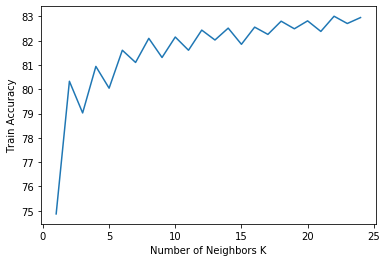

In [79]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(1,25)

#Create empty list that will hold cv scores
cv_scores = []
train_score_array = []
test_score_array = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train_res,y_train_res, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    knn.fit(X_train_res,y_train_res)
    train_score_array.append(knn.score(X_train_res,y_train_res))
    test_score_array.append(knn.score(X_test, y_test))
    

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d" % (optimal_k))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

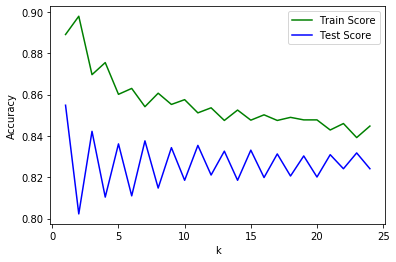

In [80]:
x_axis = range(1,25)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### KNN with optimal value of K

In [81]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_res,y_train_res)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))

print(classification_report(y_test, knnpred))
KNNCV_accuracy_score = round(accuracy_score(y_test, knnpred),2)*100
print(KNNCV_accuracy_score)


KNNCV = (cross_val_score(knn, X_train_res,y_train_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6057 1222]
 [ 171  788]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      7279
           1       0.39      0.82      0.53       959

    accuracy                           0.83      8238
   macro avg       0.68      0.83      0.71      8238
weighted avg       0.90      0.83      0.85      8238

83.0


## Finding best parameter and kernal for KNeighborsClassifier by using Grid Search 

In [82]:
model = KNeighborsClassifier(n_jobs=-1)

#Hyper Parameters Set
params = {'n_neighbors':list(np.arange(5,25)),
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model_knn = GridSearchCV(model, param_grid=params, n_jobs=1)

#Learning
model_knn.fit(X_train_res, y_train_res)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_knn.best_params_)

#Prediction
prediction_knn=model_knn.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(y_test,prediction_knn))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction_knn))


Best Hyper Parameters:
 {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 24, 'weights': 'distance'}
Accuracy: 0.8232580723476572
Confusion Metrix:
 [[5962 1317]
 [ 139  820]]


## KNN with its best parameter

In [83]:
knn_final = KNeighborsClassifier(n_neighbors=24, n_jobs = -1,weights = 'distance', leaf_size = 1, algorithm = 'auto' )
knn_final.fit(X_train_res,y_train_res)
knnpred_final = knn_final.predict(X_test)

print(confusion_matrix(y_test, knnpred_final))

print(classification_report(y_test, knnpred_final))
KNNCV_tunned = round(accuracy_score(y_test, knnpred_final),2)*100
print(KNNCV_tunned)

KNNCV_prec =  precision_score(y_test, knnpred_final)


[[5962 1317]
 [ 139  820]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7279
           1       0.38      0.86      0.53       959

    accuracy                           0.82      8238
   macro avg       0.68      0.84      0.71      8238
weighted avg       0.91      0.82      0.85      8238

82.0


In [91]:
KNNCV_prec =  precision_score(y_test, knnpred_final)
print(KNNCV_prec)

0.3837154890032756


# 4. selecting the best model 

In [106]:
models = pd.DataFrame({
                'Models': ['Logistic Model','Support Vector Machine_RBF','Decision Tree Classifier','K-Near Neighbors'],
                'CrossVal_TrainScore':[LOGCV,SVCCV,DTREECV,KNNCV] ,
                'Precision_Score':[LOGCV_prec,SVCCCV_prec_rbf,DTREECV_prec,KNNCV_prec],
                'AcuracyScore_withoutTuning': [LOGCV_accuracy_score,SVCCV_accuracy_score,DTREECV_accuracy_score,KNNCV_accuracy_score] ,
                'AcuracyScore_WithTunnedParam': [ LOGCV_tunned,SVCCV_tunned,DTREECV_tunned,KNNCV_tunned]})
                

models.sort_values(by='Precision_Score', ascending=False)

,Models,CrossVal_TrainScore,Precision_Score,AcuracyScore_withoutTuning,AcuracyScore_WithTunnedParam
1,Support Vector Machine_RBF,0.863628,0.437855,84.0,85.0
0,Logistic Model,0.856564,0.418989,85.0,85.0
3,K-Near Neighbors,0.825328,0.383715,83.0,82.0
2,Decision Tree Classifier,0.838630,0.356034,82.0,80.0


### The best model will be:-
1. The best model we will be using is Support Vector Machine_RBF.
2. Support Vector Machine with RBF kernal is able to classify well in comaprision to other ML algorithems.
3. We can go by accuracy score after tunning the parameters with the help of GridSearchCV and found that Logistic Regression and SVM has the highest accuracy score.
> Accuracy = TP+TN/TP+FP+FN+TN
4. But if we go by precision score then we found that SVM_RBF has the highest precision score.
> Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

> Precision = TP/TP+FP


In [107]:
# confusion matrix for SVM with kernal RBF
#Best C: 1000
#Best Kernel: rbf
#Best Gamma: 0.001

# If we take poitive class (class of interest as YES (1) then out of 959, 849 were predicted correct)

#value count 1's and 0's
print(y_test.value_counts())

#confusion matrix
print(confusion_matrix(y_test, Ker_pred_rbf))


0    7279
1     959
Name: y, dtype: int64
[[6189 1090]
 [ 110  849]]
